# Projeto 3 Ciência dos dados
  ### Michel Haikewitsch, Tiago Mingossi e Pedro Maciel
  #### Tema: CartolaFC

# Pergunta:
  ### Seja que os melhores e os piores do campoeonato realmente deveriam estar em suas respectivas posições?

In [2]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns; sns.set()  # for plot styling


In [89]:
#tabelas do campeonato de 2014
dados2=pd.read_csv('db/2014/scouts.csv',sep=',')
atletas2=pd.read_csv('db/2014/Atletas.csv',sep=',')
clubes2=pd.read_csv('db/2014/Clubes.csv',sep=',')
jogos2= pd.read_csv('db/2014/matches-brasileirao-2014.csv',sep=',')
partidas2=pd.read_csv('db/2014/Partidas.csv',sep=',')
posicoes2=pd.read_csv('db/2014/Posicoes.csv',sep=',')
status2=pd.read_csv('db/2014/Lances.csv',sep=',') 

#tabelas do campeonato de 2015
dados1=pd.read_csv('db/2015/scouts.csv',sep=',')
atletas1=pd.read_csv('db/2015/Atletas.csv',sep=',')
clubes1=pd.read_csv('db/2015/Clubes.csv',sep=',')
jogos1= pd.read_csv('db/2015/matches-brasileirao-2015.csv',sep=',')
partidas1=pd.read_csv('db/2015/Partidas.csv',sep=',')
posicoes1=pd.read_csv('db/2015/Posicoes.csv',sep=',')
status1=pd.read_csv('db/2015/Status.csv',sep=',')

#tabelas do campeonato de 2016
dados=pd.read_csv('db/2016/scouts.csv',sep=',')
atletas=pd.read_csv('db/2016/Atletas.csv',sep=',')
clubes=pd.read_csv('db/2016/Clubes.csv',sep=',')
jogos= pd.read_csv('db/2016/matches-brasileirao-2016.csv',sep=',')
partidas=pd.read_csv('db/2016/Partidas.csv',sep=',')
posicoes=pd.read_csv('db/2016/Posicoes.csv',sep=',')
status=pd.read_csv('db/2016/Status.csv',sep=',')

atletas=atletas.rename(columns={'ID': "AtletaID"})
clubes=clubes.rename(columns={'ID': "ClubeID"})
dados= pd.merge(dados,atletas[['AtletaID', 'PosicaoID', 'Apelido']], on='AtletaID')
dados=pd.merge(dados,clubes[['ClubeID', 'Abreviacao']], on ="ClubeID")
dados=dados.drop(['ClubeID', 'AtletaID'], axis=1)
dados=dados.rename(columns={'Abreviacao': 'Sigla'})
dados=dados.rename(columns={'Apelido': 'Atleta'})
clubes=clubes.rename(columns={'ID': "ClubeID"})

# Dados de 2016:
pegamos os dois primeiros e os dois ultimos da tabela, para ver o desempenho de seus jogadores no cartola

In [93]:
#classificando cada sigla com o nome referente ao do clube
palmeiras= dados[dados.Sigla=="PAL"]
santos= dados[dados.Sigla=="SAN"]
flamengo= dados[dados.Sigla=='FLA' ]
atleticomg= dados[dados.Sigla=='CAM']
botafogo= dados[dados.Sigla=='BOT']
atleticopr= dados[dados.Sigla=='CAP']
corinthians= dados[dados.Sigla=='COR']
pontepreta= dados[dados.Sigla=='PON']
gremio= dados[dados.Sigla=='GRE']
saopaulo= dados[dados.Sigla=='SAO']
chapecoense= dados[dados.Sigla=='CHA']
cruzeiro= dados[dados.Sigla=='CRU']
fluminense= dados[dados.Sigla=='FLU']
sport= dados[dados.Sigla=='SPT']
coritiba= dados[dados.Sigla=='CFC']
vitoria= dados[dados.Sigla=='VIT']
internacional= dados[(dados.Sigla=='INT')]
figueirense= dados[(dados.Sigla=='FIG')]
santacruz= dados[(dados.Sigla=='SCZ')]
america= dados[dados.Sigla=='AME']

In [100]:
#criando listas com a somatoria da pontuacao do time em cada uma das rodadas 

lista=np.arange(0,39,1)

listapal=[]
listasan=[]
listafla=[]
listacam=[]
listaint=[]
listafig=[]
listascz=[]
listaame=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.Pontos.sum()
    listapal.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.Pontos.sum()
    listasan.append(p_santos)
    ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.Pontos.sum()
    listafla.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.Pontos.sum()
    listacam.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.Pontos.sum()
    listaint.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.Pontos.sum()
    listafig.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.Pontos.sum()
    listascz.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.Pontos.sum()
    listaame.append(p_america)

In [101]:
#criando nova dataframe com  a pontuacao conforme as rodadas
s = pd.DataFrame([lista,listapal, listasan, listafla, listacam, listaint, listafig, listascz, listaame]).T
s.columns = ['Rodada','Palmeiras', 'Santos','Flamengo','AtleticoMG','Internacional','Figueirense','SantaCruz', 'AmericaMG']

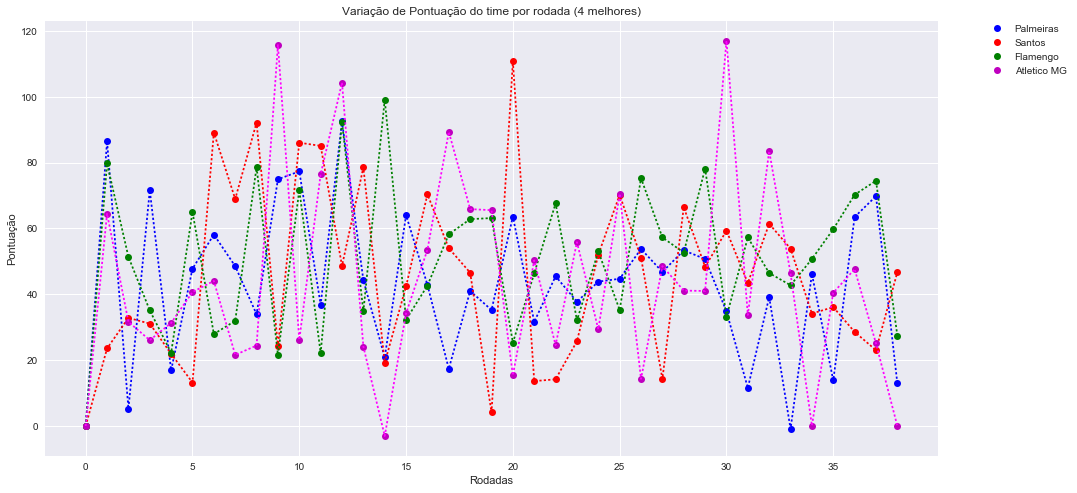

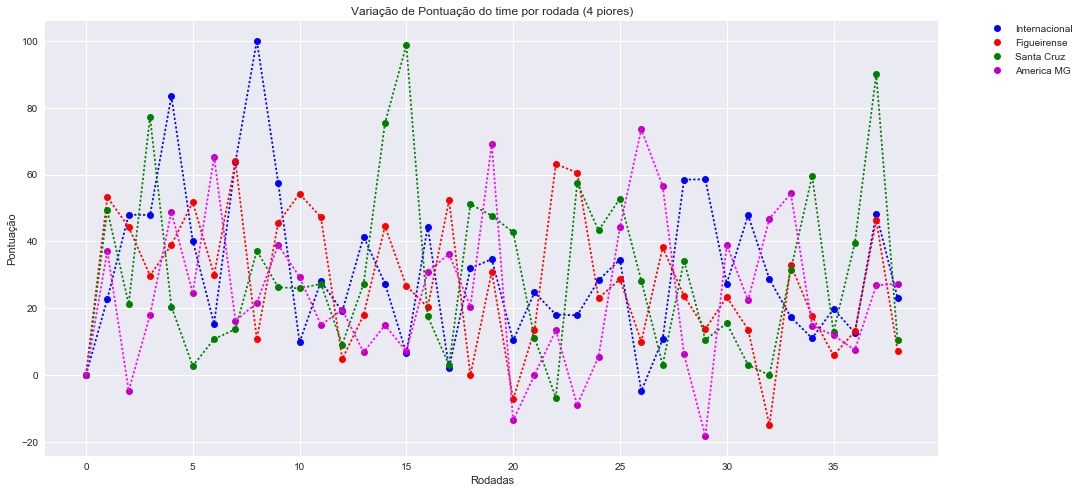

In [103]:
lista=np.arange(0,39,1)
listax=[]
listay=[]
listay2=[]
listay3=[]
listay4=[]
listay5=[]
listay6=[]
listay7=[]
listay8=[]
for i in range(len(lista)):
    x = s['Rodada'][i]
    listax.append(x)
    y = s['Palmeiras'][i]
    listay.append(y)
    y2 = s['Santos'][i]
    listay2.append(y2)
    y3 = s['Flamengo'][i]
    listay3.append(y3)
    y4 = s['AtleticoMG'][i]
    listay4.append(y4)
    y5 = s['Internacional'][i]
    listay5.append(y5)
    y6 = s['Figueirense'][i]
    listay6.append(y6)
    y7 = s['SantaCruz'][i]
    listay7.append(y7)
    y8 = s['AmericaMG'][i]
    listay8.append(y8)

plt.figure(figsize=(16,8))
plt.plot(listax,listay,'bo',label='Palmeiras')
plt.plot(listax,listay,'k:', color='blue')
plt.plot(listax,listay2,'ro',label='Santos')
plt.plot(listax,listay2,'k:', color='red')
plt.plot(listax,listay3,'go',label='Flamengo')
plt.plot(listax,listay3,'k:', color='green')
plt.plot(listax,listay4,'mo',label='Atletico MG')
plt.plot(listax,listay4,'k:', color='magenta')
plt.title("Variação de Pontuação do time por rodada (4 melhores)")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(listax,listay5,'bo',label='Internacional')
plt.plot(listax,listay5,'k:', color='blue')
plt.plot(listax,listay6,'ro',label='Figueirense')
plt.plot(listax,listay6,'k:', color='red')
plt.plot(listax,listay7,'go',label='Santa Cruz')
plt.plot(listax,listay7,'k:', color='green')
plt.plot(listax,listay8,'mo',label='America MG')
plt.plot(listax,listay8,'k:', color='magenta')
plt.title("Variação de Pontuação do time por rodada (4 piores)")
plt.xlabel('Rodadas')
plt.ylabel('Pontuação')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [1]:
#criando listas com a somatoria do valor do time em cada uma das rodadas 

lista=np.arange(0,39,1)

listapal=[]
listasan=[]
listafla=[]
listacam=[]
listaint=[]
listafig=[]
listascz=[]
listaame=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.Preco.sum()
    listapal.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.Preco.sum()
    listasan.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.Preco.sum()
    listafla.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.Preco.sum()
    listacam.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.Preco.sum()
    listaint.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.Preco.sum()
    listafig.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.Preco.sum()
    listascz.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.Preco.sum()
    listaame.append(p_america)

NameError: name 'np' is not defined

In [109]:
#criando nova dataframe com o valor conforme as rodadas
z = pd.DataFrame([lista,listapal, listasan, listafla, listacam, listaint, listafig,listascz, listaame]).T
z.columns = ['Rodada','Palmeiras', 'Santos','Flamengo','AtleticoMG','Internacional','Figueirense','SantaCruz', 'AmericaMG']

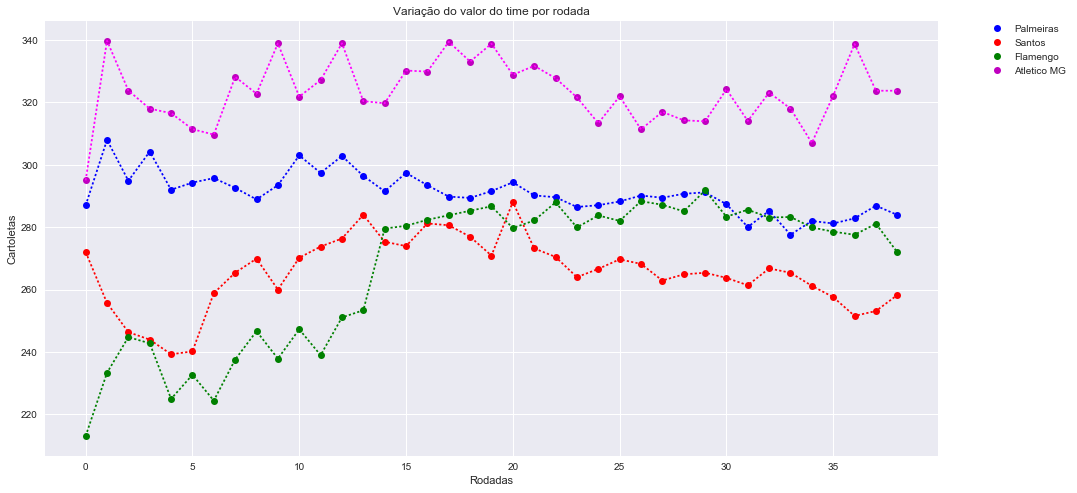

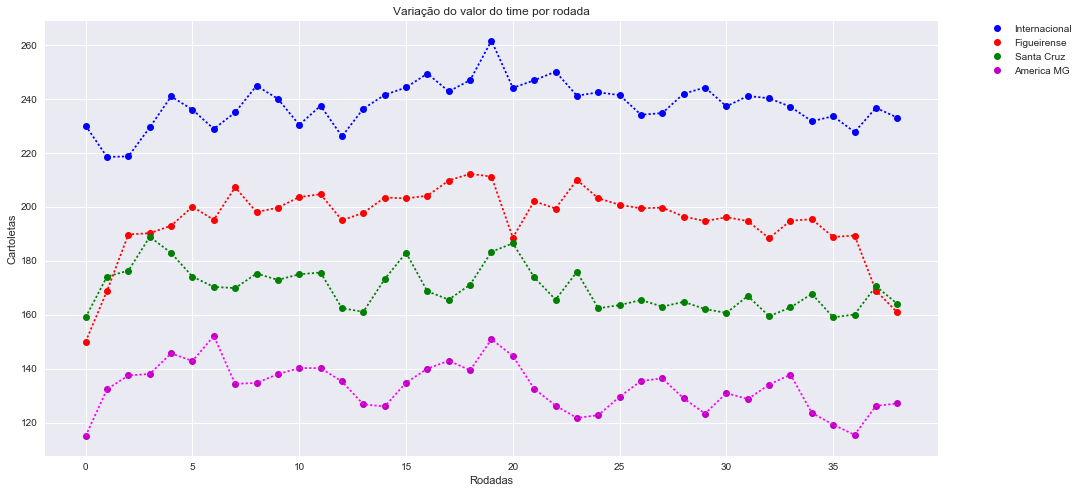

In [115]:
lista=np.arange(0,39,1)
listax=[]
listay=[]
listay2=[]
listay3=[]
listay4=[]
listay5=[]
listay6=[]
listay7=[]
listay8=[]

for i in range(len(lista)):
    x = z['Rodada'][i]
    listax.append(x)
    y = z['Palmeiras'][i]
    listay.append(y)
    y2 = z['Santos'][i]
    listay2.append(y2)
    y3 = z['Flamengo'][i]
    listay3.append(y3)
    y4 = z['AtleticoMG'][i]
    listay4.append(y4)
    y5 = z['Internacional'][i]
    listay5.append(y5)
    y6 = z['Figueirense'][i]
    listay6.append(y6)
    y7 = z['SantaCruz'][i]
    listay7.append(y7)
    y8 = z['AmericaMG'][i]
    listay8.append(y8)

plt.figure(figsize=(16,8))
plt.plot(listax,listay,'bo',label='Palmeiras')
plt.plot(listax,listay,'k:', color='blue')
plt.plot(listax,listay2,'ro',label='Santos')
plt.plot(listax,listay2,'k:', color='red')
plt.plot(listax,listay3,'go',label='Flamengo')
plt.plot(listax,listay3,'k:', color='green')
plt.plot(listax,listay4,'mo',label='Atletico MG')
plt.plot(listax,listay4,'k:', color='magenta')
plt.title("Variação do valor do time por rodada")
plt.xlabel('Rodadas')
plt.ylabel('Cartoletas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(listax,listay5,'bo',label='Internacional')
plt.plot(listax,listay5,'k:', color='blue')
plt.plot(listax,listay6,'ro',label='Figueirense')
plt.plot(listax,listay6,'k:', color='red')
plt.plot(listax,listay7,'go',label='Santa Cruz')
plt.plot(listax,listay7,'k:', color='green')
plt.plot(listax,listay8,'mo',label='America MG')
plt.plot(listax,listay8,'k:', color='magenta')
plt.title("Variação do valor do time por rodada")
plt.xlabel('Rodadas')
plt.ylabel('Cartoletas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [126]:
#criando listas com a somatoria de cartoes amarelos em cada rodada 

lista=np.arange(0,39,1)

listapal_CA=[]
listasan_CA=[]
listafla_CA=[]
listacam_CA=[]
listaint_CA=[]
listafig_CA=[]
listascz_CA=[]
listaame_CA=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.CA.sum()
    listapal_CA.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.CA.sum()
    listasan_CA.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.CA.sum()
    listafla_CA.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.CA.sum()
    listacam_CA.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.CA.sum()
    listaint_CA.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.CA.sum()
    listafig_CA.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.CA.sum()
    listascz_CA.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.CA.sum()
    listaame_CA.append(p_america)
    
    
#criando listas com a somatoria de cartoes vermelhos em cada rodada 
    
listapal_CV=[]
listasan_CV=[]
listafla_CV=[]
listacam_CV=[]
listaint_CV=[]
listafig_CV=[]
listascz_CV=[]
listaame_CV=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.CV.sum()
    listapal_CV.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.CV.sum()
    listasan_CV.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.CV.sum()
    listafla_CV.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.CV.sum()
    listacam_CV.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.CV.sum()
    listaint_CV.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.CV.sum()
    listafig_CV.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.CV.sum()
    listascz_CV.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.CV.sum()
    listaame_CV.append(p_america)
    

#criando listas com a somatoria de faltas cometidas em cada rodada 

listapal_FC=[]
listasan_FC=[]
listafla_FC=[]
listacam_FC=[]
listaint_FC=[]
listafig_FC=[]
listascz_FC=[]
listaame_FC=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.FC.sum()
    listapal_FC.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.FC.sum()
    listasan_FC.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.FC.sum()
    listafla_FC.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.FC.sum()
    listacam_FC.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.FC.sum()
    listaint_FC.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.FC.sum()
    listafig_FC.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.FC.sum()
    listascz_FC.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.FC.sum()
    listaame_FC.append(p_america)
    

#criando listas com a somatoria de gols em cada rodada 

listapal_G=[]
listasan_G=[]
listafla_G=[]
listacam_G=[]
listaint_G=[]
listafig_G=[]
listascz_G=[]
listaame_G=[]

for i in range(len(lista)): 
    
    ## palmeiras
    p_palmeiras=palmeiras[palmeiras.Rodada==i]
    p_palmeiras=p_palmeiras.G.sum()
    listapal_G.append(p_palmeiras)
    ## santos
    p_santos=santos[santos.Rodada==i]
    p_santos=p_santos.G.sum()
    listasan_G.append(p_santos)
     ## flamengo
    p_flamengo=flamengo[flamengo.Rodada==i]
    p_flamengo=p_flamengo.G.sum()
    listafla_G.append(p_flamengo)
    ## atleticomg
    p_atleticomg=atleticomg[atleticomg.Rodada==i]
    p_atleticomg=p_atleticomg.G.sum()
    listacam_G.append(p_atleticomg)
    
    ## internacional
    p_internacional=internacional[internacional.Rodada==i]
    p_internacional=p_internacional.G.sum()
    listaint_G.append(p_internacional)
    ## figueirense
    p_figueirense=figueirense[figueirense.Rodada==i]
    p_figueirense=p_figueirense.G.sum()
    listafig_G.append(p_figueirense)
    ## santacruz
    p_santacruz=santacruz[santacruz.Rodada==i]
    p_santacruz=p_santacruz.G.sum()
    listascz_G.append(p_santacruz)
    ## america
    p_america=america[america.Rodada==i]
    p_america=p_america.G.sum()
    listaame_G.append(p_america)
    

In [127]:
#criando nova dataframe de cada em dos times
p = pd.DataFrame([lista,listapal_CA,listapal_CV,listapal_FC,listapal_G]).T
p.columns = ['Rodada','CA', 'CV','FC', 'G']
st = pd.DataFrame([lista,listasan_CA,listasan_CV,listasan_FC,listasan_G]).T
st.columns = ['Rodada','CA', 'CV','FC', 'G']
fl = pd.DataFrame([lista,listafla_CA,listafla_CV,listafla_FC,listafla_G]).T
fl.columns = ['Rodada','CA', 'CV','FC', 'G']
ca = pd.DataFrame([lista,listacam_CA,listacam_CV,listacam_FC,listacam_G]).T
ca.columns = ['Rodada','CA', 'CV','FC', 'G']
it = pd.DataFrame([lista,listaint_CA,listaint_CV,listaint_FC,listaint_G]).T
it.columns = ['Rodada','CA', 'CV','FC', 'G']
fi = pd.DataFrame([lista,listafig_CA,listafig_CV,listafig_FC,listafig_G]).T
fi.columns = ['Rodada','CA', 'CV','FC', 'G']
sc = pd.DataFrame([lista,listascz_CA,listascz_CV,listascz_FC,listascz_G]).T
sc.columns = ['Rodada','CA', 'CV','FC', 'G']
am = pd.DataFrame([lista,listaame_CA,listaame_CV,listaame_FC,listaame_G]).T
am.columns = ['Rodada','CA', 'CV','FC', 'G']

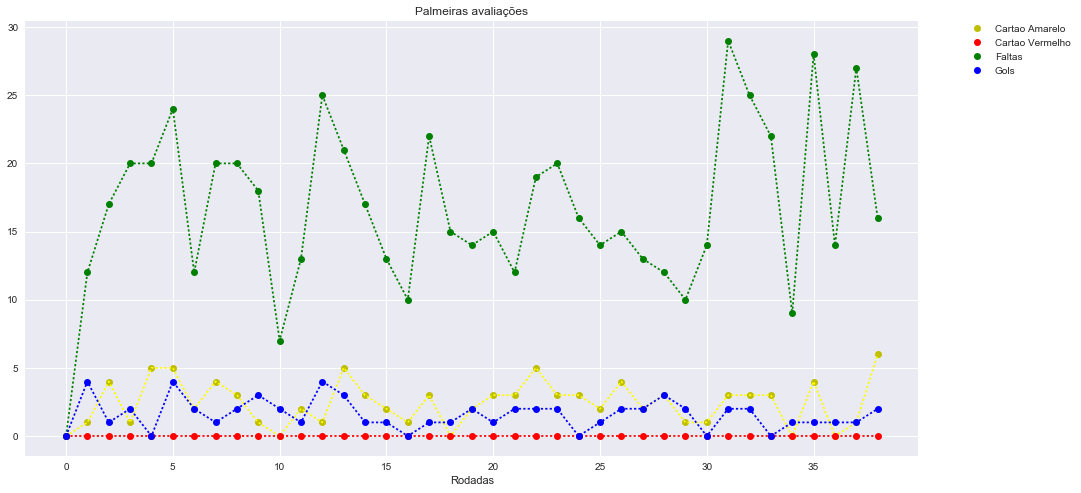

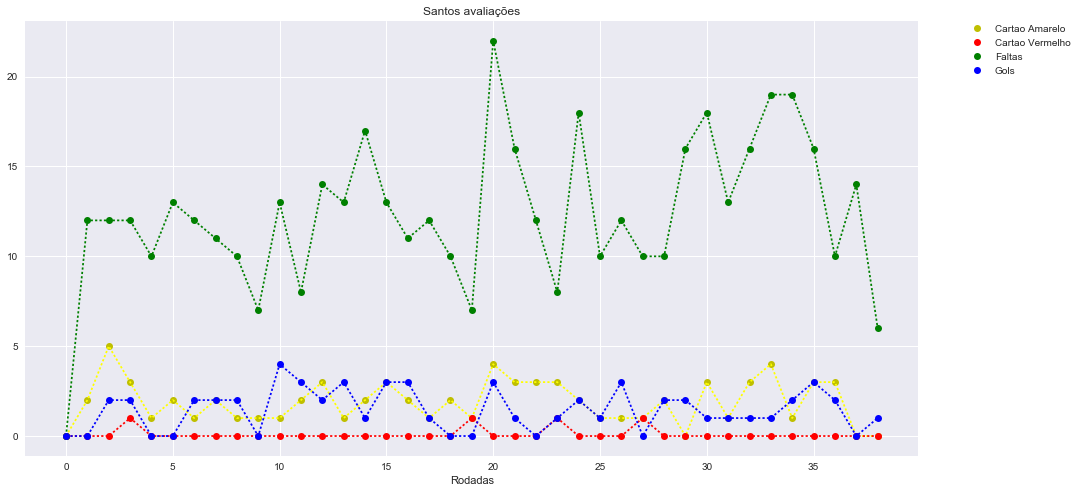

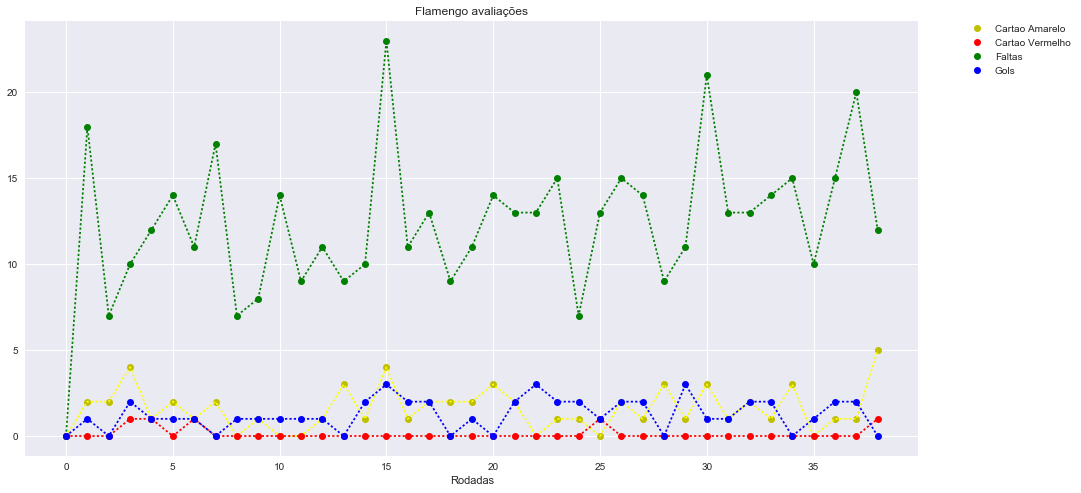

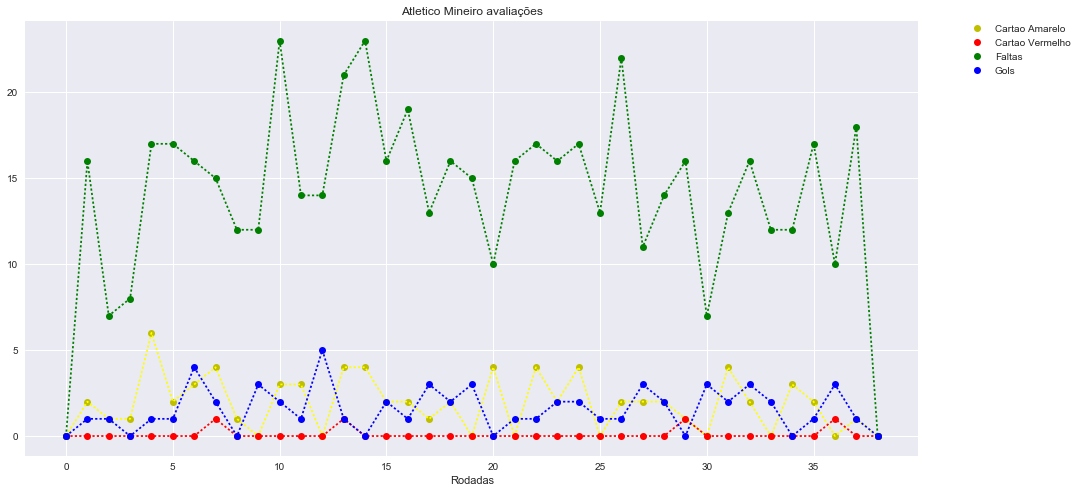

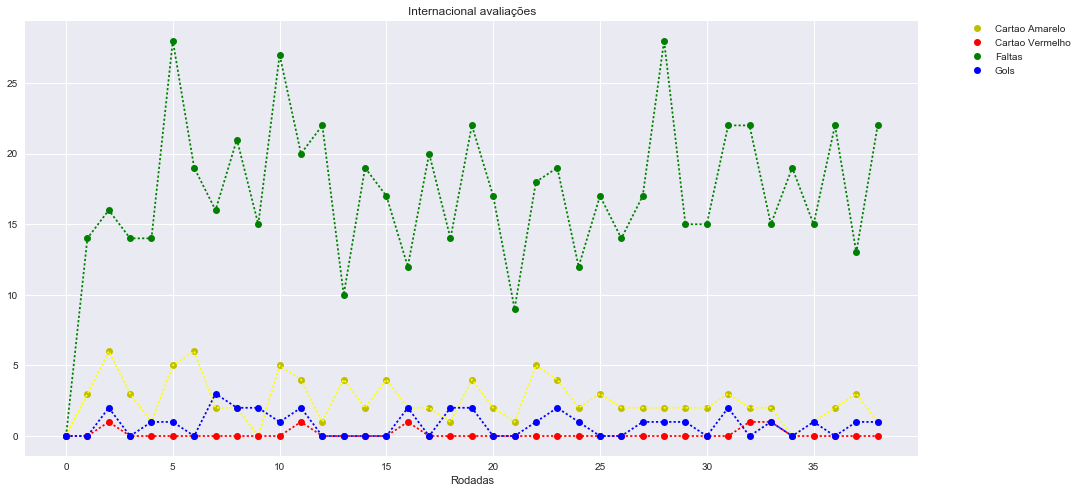

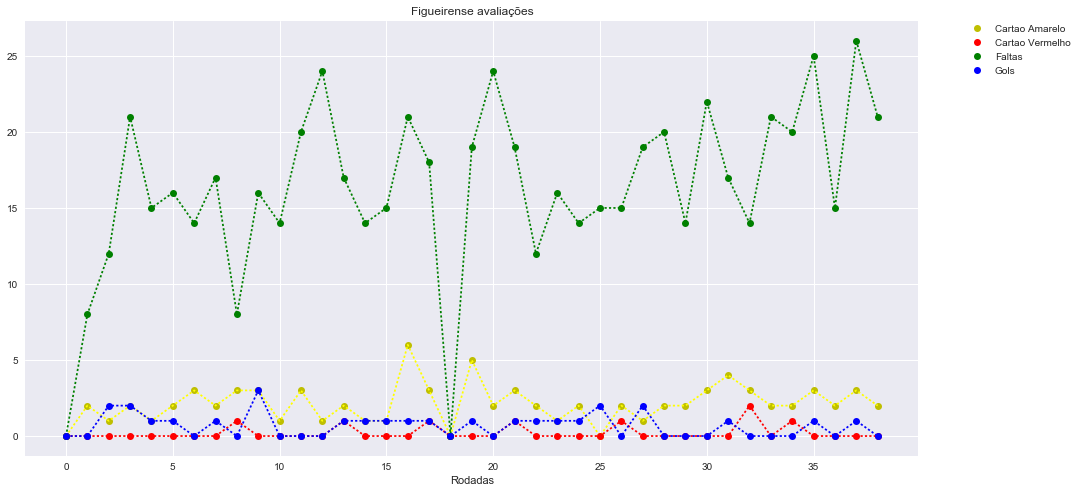

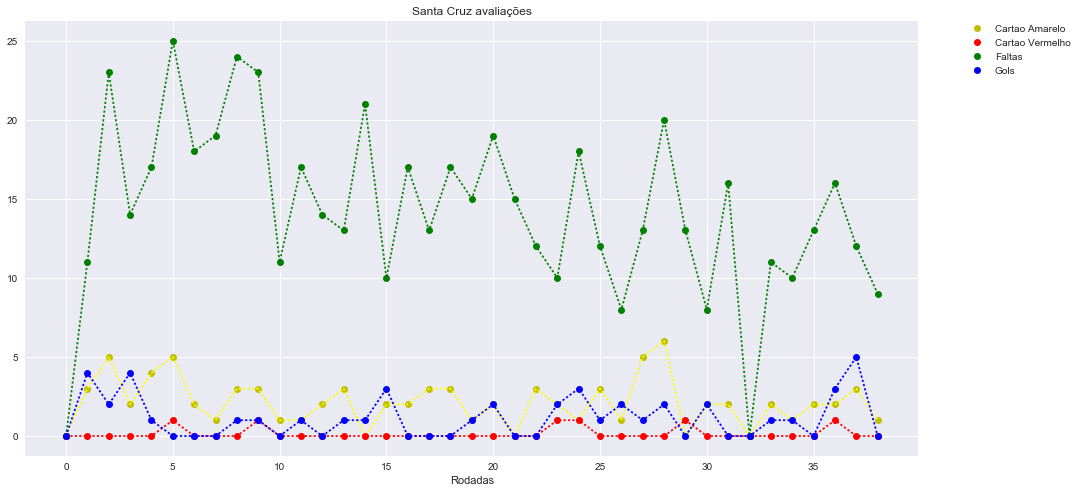

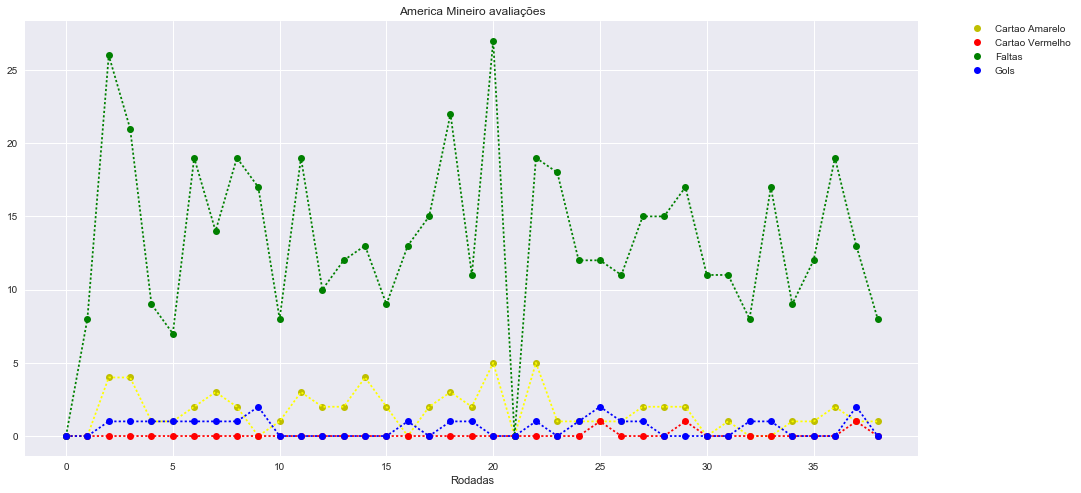

In [129]:
listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = p['Rodada'][i]
    listay.append(y)
    x = p['CA'][i]
    listax.append(x)
    x2 = p['CV'][i]
    listax2.append(x2)
    x3 = p['FC'][i]
    listax3.append(x3)
    x4 = p['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Palmeiras avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = st['Rodada'][i]
    listay.append(y)
    x = st['CA'][i]
    listax.append(x)
    x2 = st['CV'][i]
    listax2.append(x2)
    x3 = st['FC'][i]
    listax3.append(x3)
    x4 = st['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Santos avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = fl['Rodada'][i]
    listay.append(y)
    x = fl['CA'][i]
    listax.append(x)
    x2 = fl['CV'][i]
    listax2.append(x2)
    x3 = fl['FC'][i]
    listax3.append(x3)
    x4 = fl['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Flamengo avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = ca['Rodada'][i]
    listay.append(y)
    x = ca['CA'][i]
    listax.append(x)
    x2 = ca['CV'][i]
    listax2.append(x2)
    x3 = ca['FC'][i]
    listax3.append(x3)
    x4 = ca['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Atletico Mineiro avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------
listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = it['Rodada'][i]
    listay.append(y)
    x = it['CA'][i]
    listax.append(x)
    x2 = it['CV'][i]
    listax2.append(x2)
    x3 = it['FC'][i]
    listax3.append(x3)
    x4 = it['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Internacional avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------
listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = fi['Rodada'][i]
    listay.append(y)
    x = fi['CA'][i]
    listax.append(x)
    x2 = fi['CV'][i]
    listax2.append(x2)
    x3 = fi['FC'][i]
    listax3.append(x3)
    x4 = fi['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Figueirense avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = sc['Rodada'][i]
    listay.append(y)
    x = sc['CA'][i]
    listax.append(x)
    x2 = sc['CV'][i]
    listax2.append(x2)
    x3 = sc['FC'][i]
    listax3.append(x3)
    x4 = sc['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("Santa Cruz avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#---------------------------------------------------------------------------------------------------------------

listax=[]
listay=[]
listax2=[]
listax3=[]
listax4=[]
for i in range(len(lista)):
    y = am['Rodada'][i]
    listay.append(y)
    x = am['CA'][i]
    listax.append(x)
    x2 = am['CV'][i]
    listax2.append(x2)
    x3 = am['FC'][i]
    listax3.append(x3)
    x4 = am['G'][i]
    listax4.append(x4)

plt.figure(figsize=(16,8))
plt.plot(listay,listax,'yo',label='Cartao Amarelo')
plt.plot(listay,listax,'k:', color='yellow')
plt.plot(listay,listax2,'ro',label='Cartao Vermelho')
plt.plot(listay,listax2,'k:', color='red')
plt.plot(listay,listax3,'go',label='Faltas')
plt.plot(listay,listax3,'k:', color='green')
plt.plot(listay,listax4,'bo',label='Gols')
plt.plot(listay,listax4,'k:', color='blue')
plt.title("America Mineiro avaliações")
plt.xlabel('Rodadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()